In [1]:
# the jupyter specific part
from IPython.display import Markdown as md
import ipywidgets as widget

# enlargen jupyter notebook window
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 95%; }
</style>
"""))

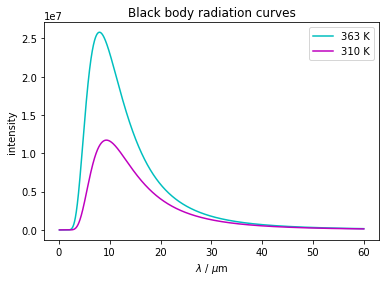

λ max = 7.982999999999968 μm
I max =  25814194.477863766 J m^2


In [6]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as scc

def spectral_density(lambdanm, T):
    # Planck's law
    h = scc.h # Planck's constant
    c = scc.c # speed of light
    k = scc.k # Boltzmann constant
    return 2.0*h*c**2/ ( (lambdanm**5) * (np.exp(h*c/(lambdanm*k*T)) - 1.0) )

def total_radiation(T):
    # Stefan–Boltzmann law
    pi = scc.pi # π 
    h  = scc.h  # Planck's constant
    c  = scc.c  # speed of light
    k  = scc.k  # Boltzmann constant
    
    sigma = ( 2 * pi**5 * k**4 ) / ( 15 * c**2 * h**3 )
    j = sigma * T**4
    return j

## wavelengths in increments from 100nm to 60 um in 1 nm increments
wavelengths = np.arange(100e-9, 60e-6, 1e-9) 

#note the use of the multiplier on the wavelengths such that it willnow have units of μm
plt.plot(wavelengths*1e6, spectral_density(wavelengths, 363.), 'c-', label='363 K') #hotcupoftea - cyan
plt.plot(wavelengths*1e6, spectral_density(wavelengths, 310.), 'm-', label='310 K') #person - magenta

plt.title('Black body radiation curves')
plt.legend() # Shows the legend
plt.xlabel('$\lambda$ / $\mu$m')
plt.ylabel('intensity')
## show the plot
plt.show()

print ("λ max =", wavelengths[np.argmax(spectral_density(wavelengths, 363.))]*1e6, "μm")
#maximum wavelength of emission, np.argmax(intensity373,axis=0)] is pulling the maximum value from the intensity array and then matching it to the corresponding wavelength in put to the calculation
#you can get the mu symbol by typing in the latex for it then pressing tab! so \mu tab!
print ("I max = ", np.amax(spectral_density(wavelengths, 363.)), "J m^2")



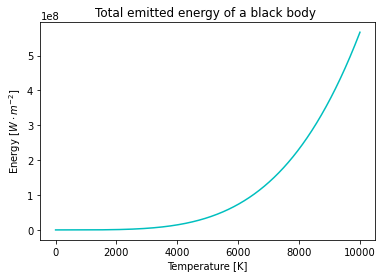

In [12]:
temperatures = np.arange(0, 10000, 0.1) 

plt.plot(temperatures, total_radiation(temperatures), 'c-') 

plt.title('Total emitted energy of a black body ')
#plt.legend() # Shows the legend
plt.xlabel('Temperature [K]')
plt.ylabel('Energy [$ W \cdot m^{-2}$]')
plt.show()


In [43]:
class Layer:
    def __init__(self, 
                 temperature=0, 
                 opacity=0.0, 
                 heat_capacity=1.0):
        self.op = opacity
        self.C  = heat_capacity
        self.Q  = temperature / heat_capacity
    
    def get_T(self):
        return self.Q / self.C
    
    def absorb(self,e):
        self.Q = self.Q + e*self.op
        
    def emmit(self):
        emission = total_radiation(self.get_T())
        self.Q -= emission
        return emission


class LayerStack:
    def __init__(self, n):
        self.layers = []
        for i in range(n):
            self.layers.append(Layer())
        
    # the layers are the main thing here, so we want
    # subscript and len() to adress them
    def __len__(self):
        return len(self.layers)
    def __getitem__(self, item):
         return self.layers[item]
    
    def step(self, incoming=0.0):
        e = incoming
        for layer in self.layers:
            layer.absorb(e)
            e = layer.emmit()
        outgoing = e
        return outgoing

In [45]:
cake = LayerStack(4)

for i in range(len(cake)):
    print(i, cake[i].Q)

cake.layers[0].Q += 1000

for i in range(len(cake)):
    print(i, cake[i].Q, cake[i].get_T())

cake.step()

for i in range(len(cake)):
    print(i, cake[i].Q, cake[i].get_T())

    
#plt.title('Total emitted energy of a black body ')
#plt.legend() # Shows the legend
#plt.xlabel('Temperature [K]')
#plt.ylabel('Energy [$ W \cdot m^{-2}$]')
#plt.show()


0 0.0
1 0.0
2 0.0
3 0.0
0 1000.0 1000.0
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
0 -55703.74419184431 -55703.74419184431
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
